<a href="https://colab.research.google.com/github/ahmadryan/MLTSA_RQudsi/blob/master/HW9_RQudsi/autoencode_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense#, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import glob
import pylab as pl
from PIL import Image

%pylab inline


Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


# 1. change kernel to GPU 
go to runtime -> change runtime type -> GPU

# 2. load faces

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My\ Drive

/content/gdrive/My Drive


In [4]:
cd data

/content/gdrive/My Drive/data


In [0]:
!wget https://cswww.essex.ac.uk/mv/allfaces/faces95.zip

--2020-04-30 19:46:12--  https://cswww.essex.ac.uk/mv/allfaces/faces95.zip
Resolving cswww.essex.ac.uk (cswww.essex.ac.uk)... 155.245.92.179
Connecting to cswww.essex.ac.uk (cswww.essex.ac.uk)|155.245.92.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6425534 (6.1M) [application/zip]
Saving to: ‘faces95.zip’

faces95.zip         100%[===================>]   6.13M  39.0MB/s    in 0.2s    

2020-04-30 19:46:12 (39.0 MB/s) - ‘faces95.zip’ saved [6425534/6425534]



In [0]:
!unzip faces95.zip

Archive:  faces95.zip
   creating: faces95/
   creating: faces95/adhast/
  inflating: faces95/adhast/adhast.1.jpg  
  inflating: faces95/adhast/adhast.10.jpg  
  inflating: faces95/adhast/adhast.11.jpg  
  inflating: faces95/adhast/adhast.12.jpg  
  inflating: faces95/adhast/adhast.13.jpg  
  inflating: faces95/adhast/adhast.14.jpg  
  inflating: faces95/adhast/adhast.15.jpg  
  inflating: faces95/adhast/adhast.16.jpg  
  inflating: faces95/adhast/adhast.17.jpg  
  inflating: faces95/adhast/adhast.18.jpg  
  inflating: faces95/adhast/adhast.19.jpg  
  inflating: faces95/adhast/adhast.2.jpg  
  inflating: faces95/adhast/adhast.20.jpg  
  inflating: faces95/adhast/adhast.3.jpg  
  inflating: faces95/adhast/adhast.4.jpg  
  inflating: faces95/adhast/adhast.5.jpg  
  inflating: faces95/adhast/adhast.6.jpg  
  inflating: faces95/adhast/adhast.7.jpg  
  inflating: faces95/adhast/adhast.8.jpg  
  inflating: faces95/adhast/adhast.9.jpg  
   creating: faces95/ajbake/
  inflating: faces95/ajbake

In [5]:
!ls faces95/*/*jpg

faces95/adhast/adhast.10.jpg  faces95/llambr/llambr.10.jpg
faces95/adhast/adhast.11.jpg  faces95/llambr/llambr.11.jpg
faces95/adhast/adhast.12.jpg  faces95/llambr/llambr.12.jpg
faces95/adhast/adhast.13.jpg  faces95/llambr/llambr.13.jpg
faces95/adhast/adhast.14.jpg  faces95/llambr/llambr.14.jpg
faces95/adhast/adhast.15.jpg  faces95/llambr/llambr.15.jpg
faces95/adhast/adhast.16.jpg  faces95/llambr/llambr.16.jpg
faces95/adhast/adhast.17.jpg  faces95/llambr/llambr.17.jpg
faces95/adhast/adhast.18.jpg  faces95/llambr/llambr.18.jpg
faces95/adhast/adhast.19.jpg  faces95/llambr/llambr.19.jpg
faces95/adhast/adhast.1.jpg   faces95/llambr/llambr.1.jpg
faces95/adhast/adhast.20.jpg  faces95/llambr/llambr.20.jpg
faces95/adhast/adhast.2.jpg   faces95/llambr/llambr.2.jpg
faces95/adhast/adhast.3.jpg   faces95/llambr/llambr.3.jpg
faces95/adhast/adhast.4.jpg   faces95/llambr/llambr.4.jpg
faces95/adhast/adhast.5.jpg   faces95/llambr/llambr.5.jpg
faces95/adhast/adhast.6.jpg   faces95/llambr/llambr.6.jpg
fac

In [97]:
flist = glob.glob("faces95/*/*jpg")
N = len(flist)
N

1440

In [98]:
imgs = np.zeros((N, 35,35, 1))
for i,f in enumerate(flist):
  if not i%50: print(i)
  im = Image.open(flist[i])
  np_im = numpy.array(im)[:,:,:3].astype(float) / 255 
  imgs[i] = numpy.array(im)[25:165:4,25:165:4,:1].astype(float) / 255

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400


In [0]:
imgn = np.zeros((N, 35,35, 1))
for i,f in enumerate(flist):
  if not i%50: print(i)
  im = Image.open(flist[i])
  np_im = numpy.array(im)[:,:,:3].astype(float) / 255 
  imgn[i] = numpy.array(im)[25:165:4,25:165:4,1:2].astype(float) / 255

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400


In [135]:
shape(im)

(200, 180, 3)

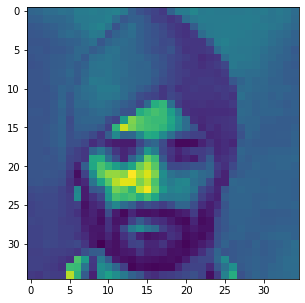

In [136]:
pl.imshow(imgs[0][:,:,0])

In [139]:
shape(imgs)

(1440, 35, 35, 1)

# digits first

(60000, 28, 28)

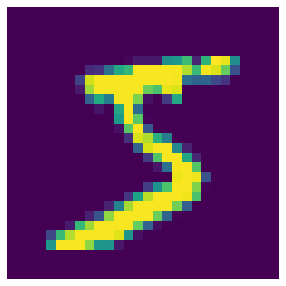

In [101]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

img_rows, img_cols = 28, 28
pl.imshow(x_train[0])
pl.axis('off')
intialshape = x_train[0].shape
ndim = np.prod(x_train[0].shape)
x_train.shape

In [102]:
shape(x_train)

(60000, 28, 28)

In [103]:
x_train.dtype, x_train.max(), x_train.min()

(dtype('uint8'), 255, 0)

In [104]:
x_train = (x_train.astype(float) / 255).reshape(len(x_train), ndim)
x_test = (x_test.astype(float) / 255).reshape(len(x_test), ndim)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# create a model

In [0]:
keras.models?

In [18]:
model_digits64 = Sequential()
## encoder
# input layer and the output size
model_digits64.add(Dense(128, activation='relu', input_dim=ndim))
#compression layer
model_digits64.add(Dense(64, activation='relu'))
## deencoder
#decompression layer, same size as in the encoder
model_digits64.add(Dense(128, activation='relu'))
#output layer, same size as input
model_digits64.add(Dense(ndim, activation='linear'))


#alternative syntax
"""
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
"""

'\nencoded = Dense(encoding_dim, activation=\'relu\')(input_img)\n# "decoded" is the lossy reconstruction of the input\ndecoded = Dense(784, activation=\'sigmoid\')(encoded)\n\nautoencoder = Model(input_img, decoded)\n\nencoder = Model(input_img, encoded)\n\n# create a placeholder for an encoded (32-dimensional) input\nencoded_input = Input(shape=(encoding_dim,))\n# retrieve the last layer of the autoencoder model\ndecoder_layer = autoencoder.layers[-1]\n# create the decoder model\ndecoder = Model(encoded_input, decoder_layer(encoded_input))\n'

### regression
- loss='mean_squared_error' L2: default loss to use for regression problems. => linear activation function in output layer, one node out

alternatives:  loss='mean_squared_logarithmic_error', 'mean_absolute_error' (which is L1 instead of L2)
### binary classification

- loss='binary_crossentropy' => sigmoid activation function in output layer, one node out

alternatives: 'hinge'

### multiclass classification
categorical encoded as numerical
- loss='categorical_crossentropy' => softmax n nodes out

onehot encoded categoridal
- 'parse_categorical_crossentropy' => softmax n nodes out

- 'kullback Leibler Divergence Loss' => probabilistic categorical classification; log(P/Q)

## optimizers
- SGD: stocastic gradient descent 
    - nesterov=True -> momentum inclusion
- adam: Adaptive moment estimation. **good in most cases**
- adagrad: different steps for different parameters based on frequency (binary input) well-suited for dealing with sparse data.

- adaDelta: like adagrad but compensated for vanishing learning rate problem

momentum refers to looking one step back and make a decision that includes the slope there

### parameter:
generally you need to adjust the learning rate which is how much you change the parameters by at each step. 
keras.optimizers.Adam(lr=0.001)


https://gitcdn.xyz/cdn/Tony607/blog_statics/e1a0b1e060e783bd1978a141acff897ae71bd021/images/optimizer/optimizer.gif

In [0]:
# choose the optimizer and loss appropriately!
model_digits64.compile(optimizer="adadelta", loss="mean_squared_error")

In [20]:
print(model_digits64.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
history64 = model_digits64.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=20, batch_size=100, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0193 - val_loss: 0.0186
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0191 - val_loss: 0.0186
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0189 - val_loss: 0.0184
Epoch 4/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0187 - val_loss: 0.0183
Epoch 5/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0186 - val_loss: 0.0181
Epoch 6/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0185 - val_loss: 0.0181
Epoch 7/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0184 - val_loss: 0.0181
Epoch 8/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0184 - val_loss: 0.0179
Epoch 9/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0183 - val_loss: 0.0180
Epoch

# always look at the loss!

Text(0.5, 0, 'iteration')

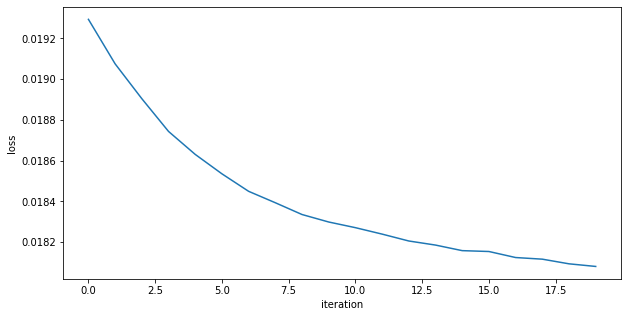

In [29]:
pl.plot(np.array(history64.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration')
#pl.yscale('log')
#pl.xscale('log')

# predict

In [0]:
output_image64 = model_digits64.predict(x_test)

In [0]:
def compareinout(i, outim, testimg, initialshape=(28,28)):
  fig = pl.figure(figsize(10,5))
  ax = fig.add_subplot(121) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(122) 
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


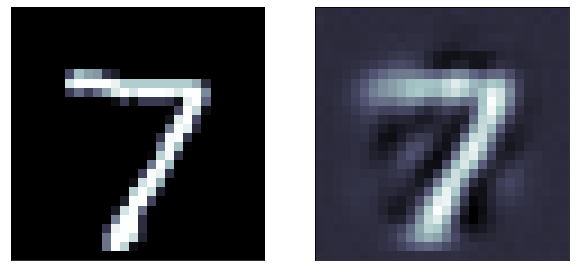

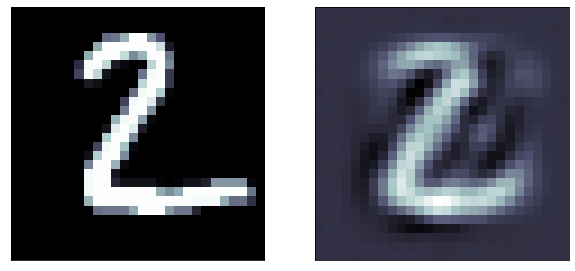

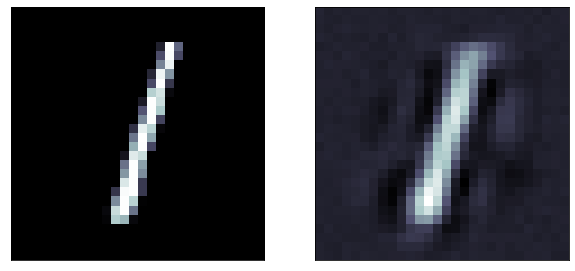

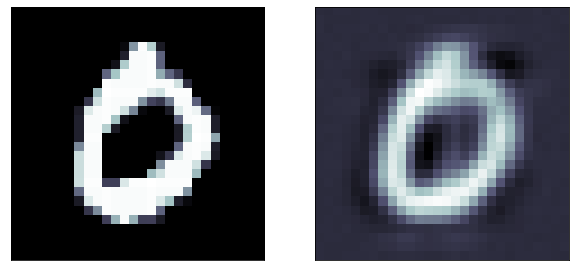

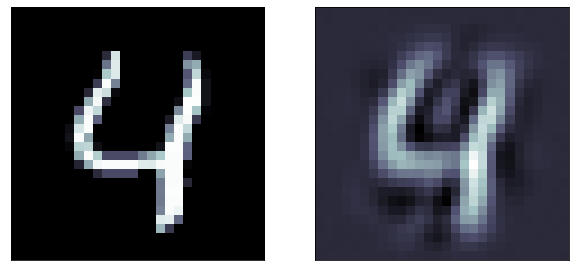

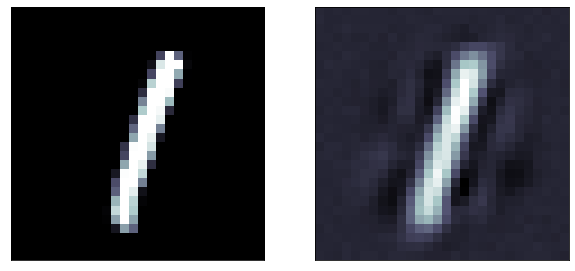

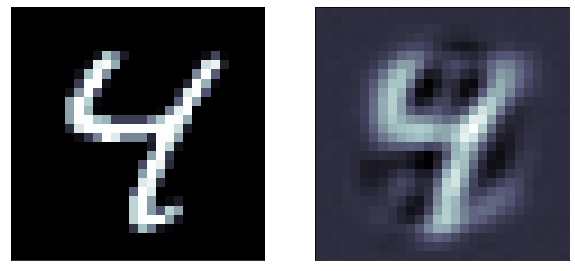

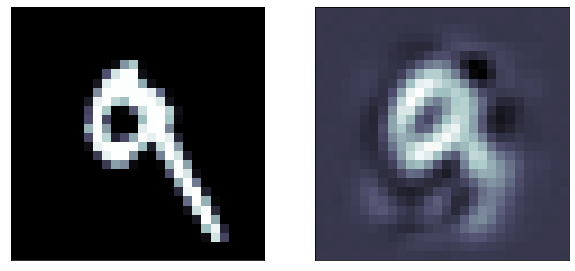

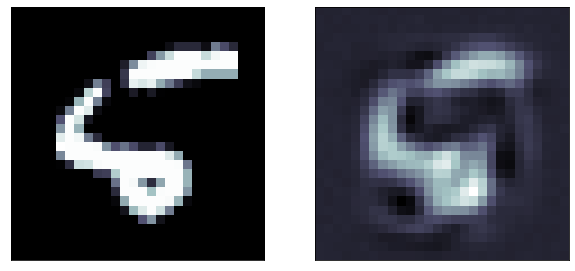

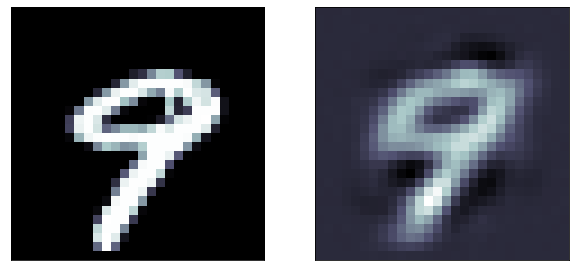

In [32]:
for i in range(10):
  compareinout(i, output_image64, x_test)

# change loss function

In [0]:
# choose the optimizer and loss appropriately!
model_digits64_sig = Sequential()
## encoder
# input layer and the output size
model_digits64_sig.add(Dense(128, activation='relu', input_dim=ndim))
#compression layer
model_digits64_sig.add(Dense(64, activation='relu'))
## deencoder
#decompression layer, same size as in the encoder
model_digits64_sig.add(Dense(128, activation='relu'))
#output layer, same size as input
model_digits64_sig.add(Dense(ndim, activation='sigmoid'))
model_digits64_sig.compile(optimizer="adadelta", loss="mean_squared_error") #binary_cross_entropy)

In [34]:
history64_sig = model_digits64_sig.fit(x_train, x_train, 
                                       validation_data=(x_test, x_test), 
                                       epochs=100, batch_size=100, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0839 - val_loss: 0.0666
Epoch 2/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0614 - val_loss: 0.0555
Epoch 3/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0508 - val_loss: 0.0458
Epoch 4/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.0431 - val_loss: 0.0399
Epoch 5/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.0382 - val_loss: 0.0355
Epoch 6/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0341 - val_loss: 0.0319
Epoch 7/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0308 - val_loss: 0.0289
Epoch 8/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.0282 - val_loss: 0.0266
Epoch 9/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.0262 - val_loss: 0.0

Text(0.5, 0, 'iteration')

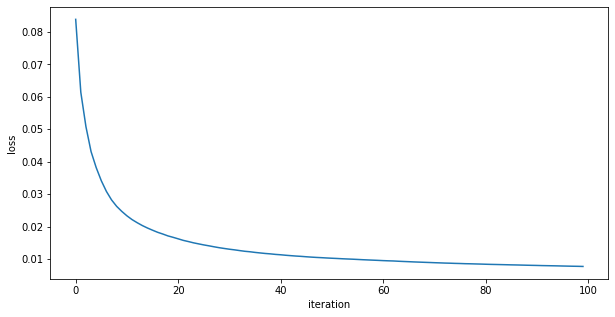

In [35]:
pl.plot(np.array(history64_sig.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration')
#pl.yscale('log')
#pl.xscale('log')

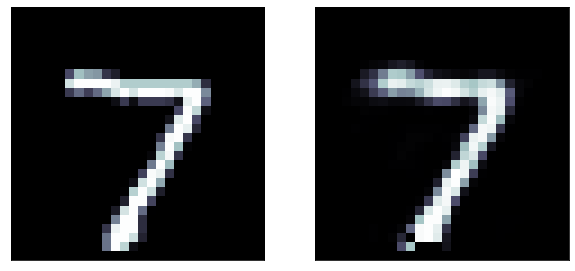

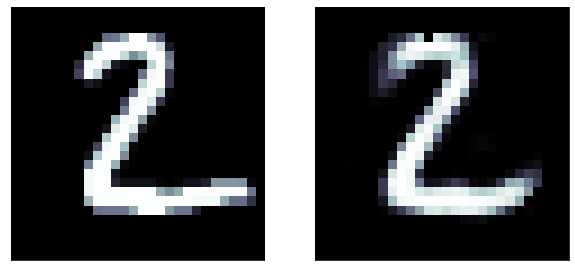

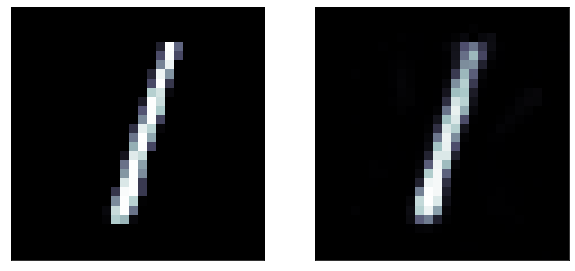

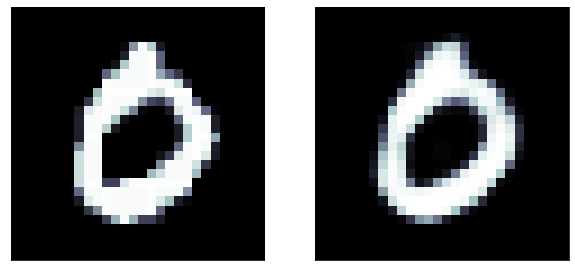

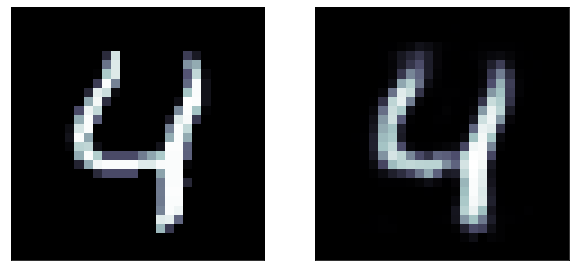

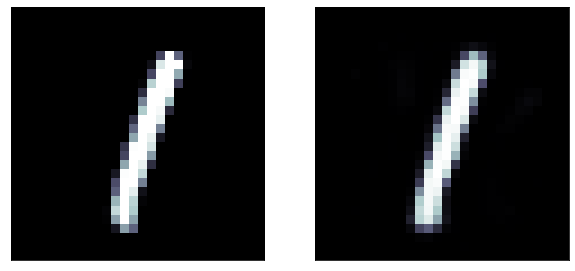

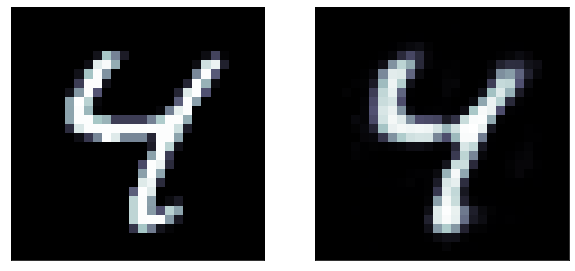

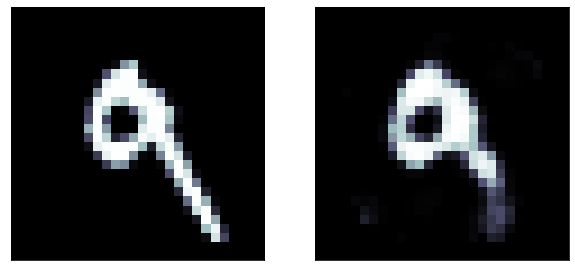

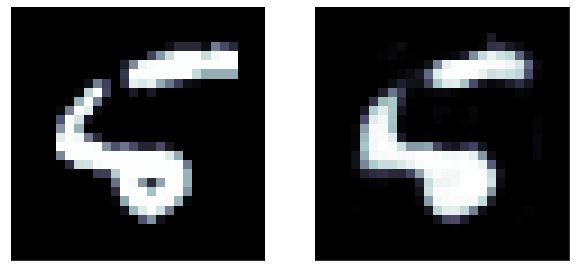

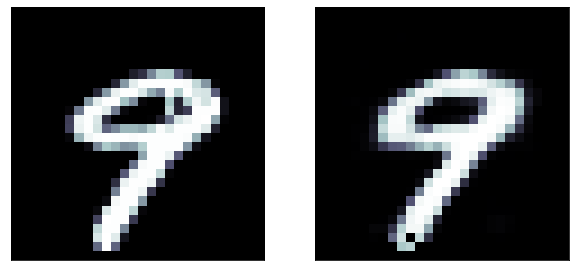

In [36]:
output_image64_sig = model_digits64_sig.predict(x_test)
for i in range(10):
  compareinout(i, output_image64_sig, x_test)

In [0]:
# sigmoid and binary cross entropy loss
model_digits64_bce = model_digits64_sig

In [38]:
model_digits64_bce.compile(optimizer="adadelta", loss="binary_crossentropy")
history64_bce = model_digits64_bce.fit(x_train, x_train, 
                                       validation_data=(x_test, x_test), 
                                       epochs=20, batch_size=100, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0943 - val_loss: 0.0897
Epoch 2/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0899 - val_loss: 0.0880
Epoch 3/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0884 - val_loss: 0.0883
Epoch 4/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0875 - val_loss: 0.0885
Epoch 5/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0867 - val_loss: 0.0862
Epoch 6/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0860 - val_loss: 0.0838
Epoch 7/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0855 - val_loss: 0.0843
Epoch 8/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0851 - val_loss: 0.0835
Epoch 9/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0846 - val_loss: 0.0827
Epoch

Text(0.5, 0, 'iteration')

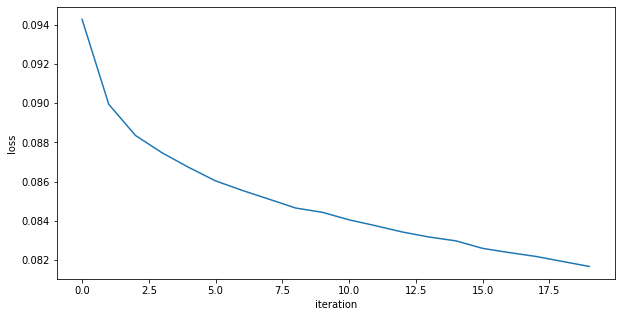

In [39]:
pl.plot(np.array(history64_bce.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration')
#pl.yscale('log')
#pl.xscale('log')

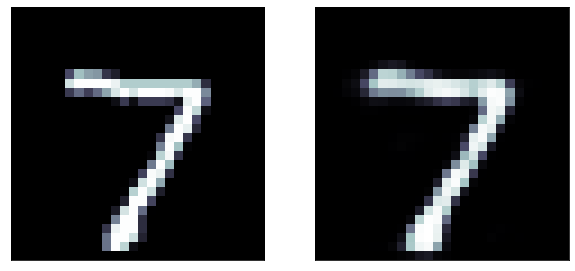

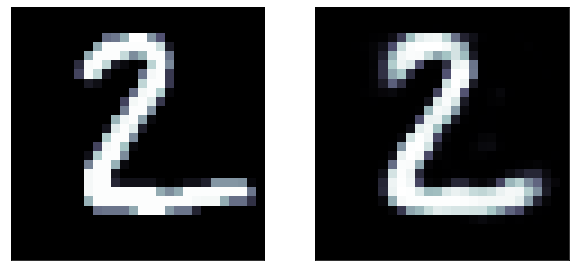

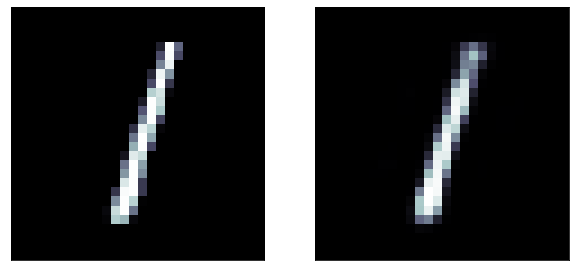

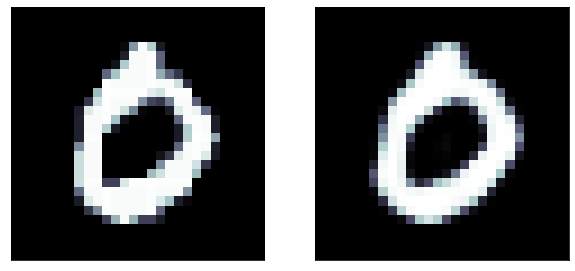

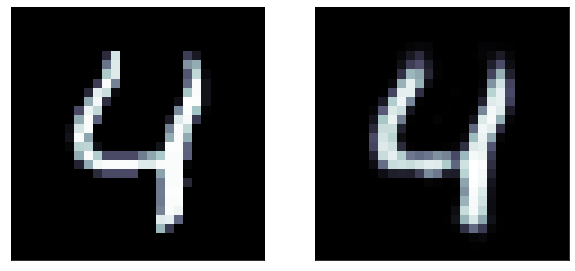

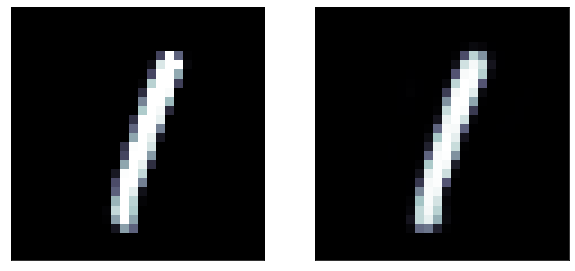

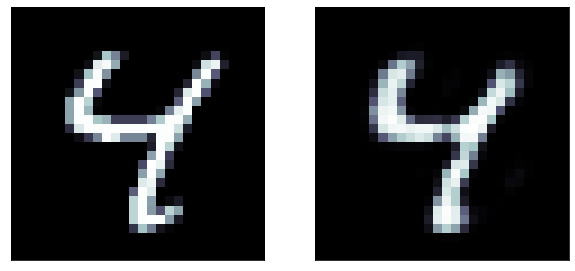

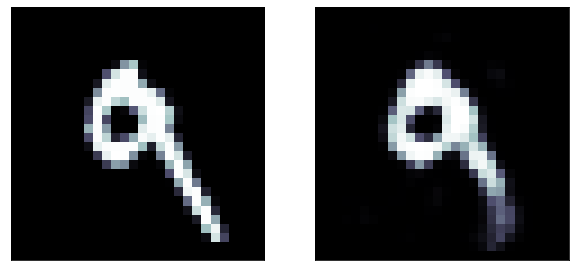

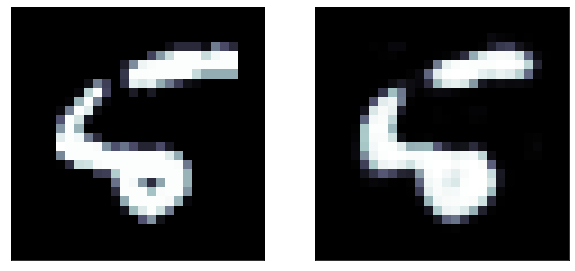

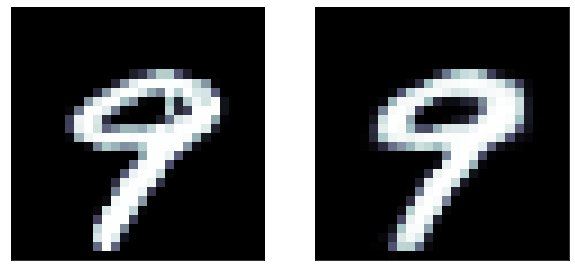

In [40]:
output_image64_bce = model_digits64_bce.predict(x_test)
for i in range(10):
  compareinout(i, output_image64_bce, x_test)

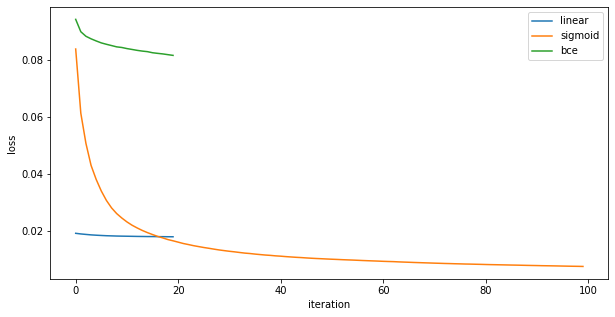

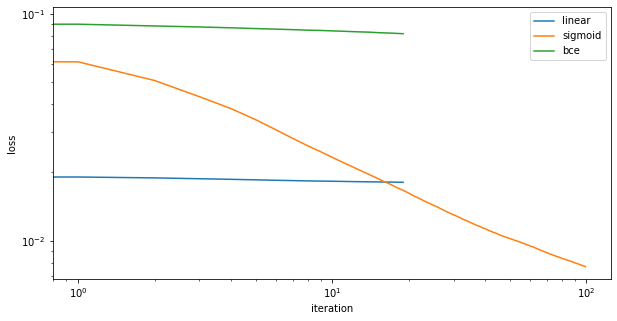

In [41]:
pl.plot(np.array(history64.history['loss']), label="linear")
pl.plot(np.array(history64_sig.history['loss']), label="sigmoid")
pl.plot(np.array(history64_bce.history['loss']), label="bce")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()
pl.figure()
pl.plot(np.array(history64.history['loss']), label="linear")
pl.plot(np.array(history64_sig.history['loss']), label="sigmoid")
pl.plot(np.array(history64_bce.history['loss']), label="bce")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.xscale('log')
pl.yscale('log')
pl.legend()

# try more compression

In [0]:
model_digits = Sequential()
#encoder
model_digits.add(Dense(128, activation='relu', input_dim=ndim))
model_digits.add(Dense(64, activation='relu'))
model_digits.add(Dense(32, activation='relu'))
#bottle neck
model_digits.add(Dense(16, activation='relu'))
#decoder
model_digits.add(Dense(32, activation='relu'))
model_digits.add(Dense(64, activation='relu'))
model_digits.add(Dense(128, activation='relu'))
model_digits.add(Dense(ndim, activation='sigmoid'))


In [0]:
model_digits.compile(optimizer="adadelta", loss="binary_crossentropy")

In [44]:
print(model_digits.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_17 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_18 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_19 (Dense)             (None, 128)              

In [45]:
history = model_digits.fit(x_train, x_train, epochs=20, batch_size=100, verbose=1)

Epoch 1/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3021
Epoch 2/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.2497
Epoch 3/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2385
Epoch 4/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2319
Epoch 5/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2188
Epoch 6/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2014
Epoch 7/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1895
Epoch 8/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1768
Epoch 9/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1690
Epoch 10/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1637
Epoch 11/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.1598
Epoch 12/20
60000/60000 [===========================

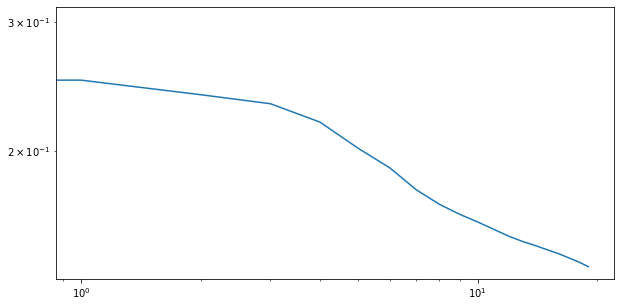

In [46]:
pl.plot(np.array(history.history['loss']))
pl.yscale('log')
pl.xscale('log')

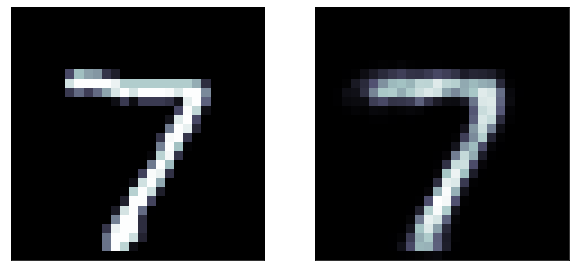

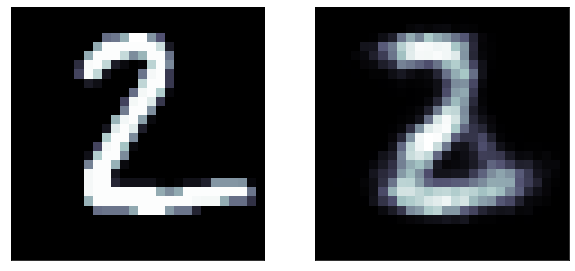

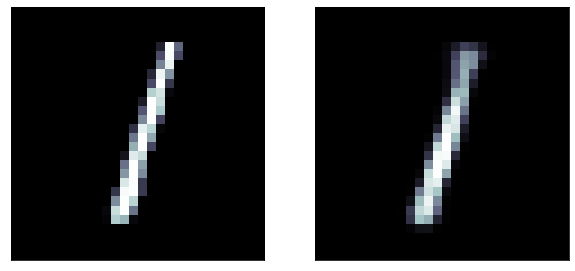

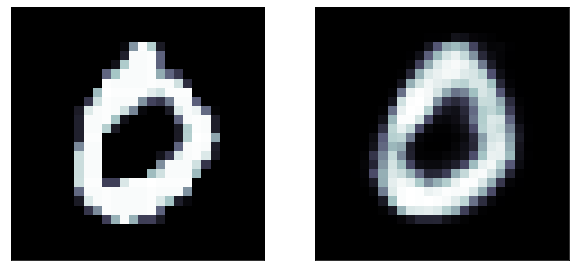

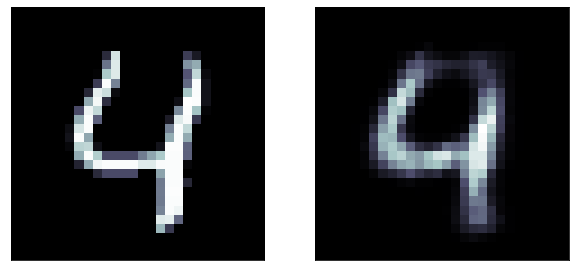

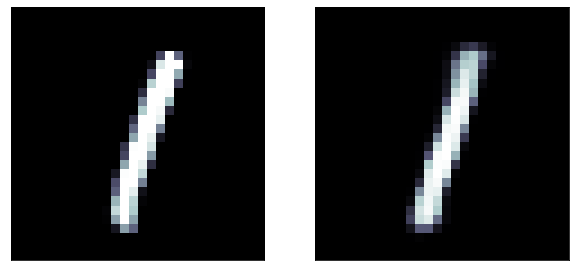

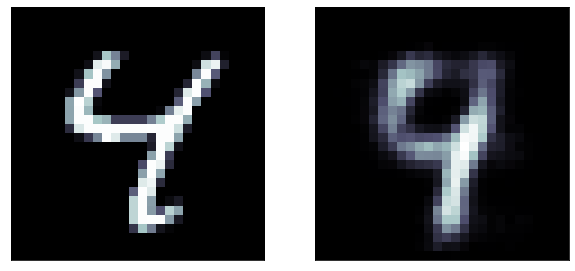

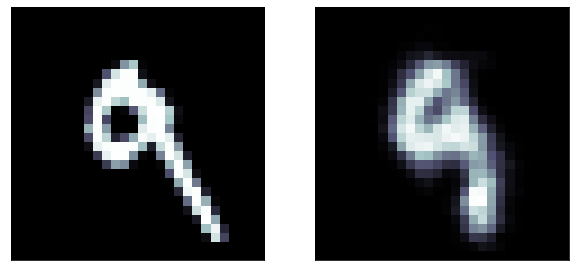

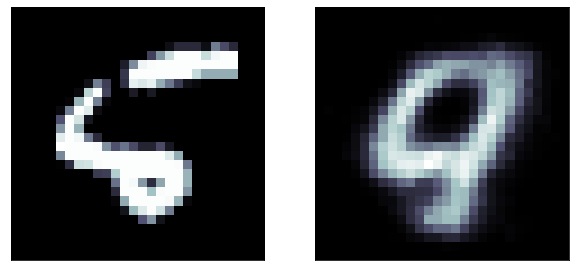

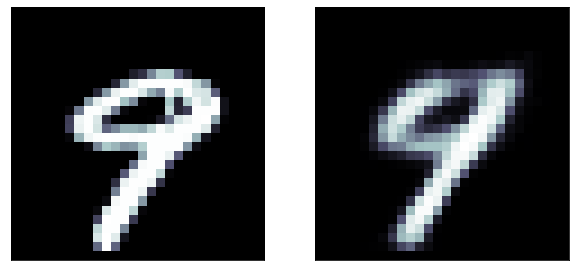

In [47]:
output_image = model_digits.predict(x_test)

for i in range(10):
  compareinout(i, output_image, x_test)

# Extract feature

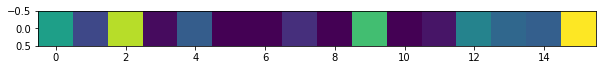

In [48]:
from keras import backend as K

inp = model_digits.input                                           # input placeholder
outputs = model_digits.layers[3].output         # all layer outputs
functors = K.function([inp], [outputs])    # evaluation functions

# Testing
layer_outs = functors(x_test[:1])
pl.imshow(layer_outs[0])

In [0]:
def compareinout_encoded(i, outim, testimg, initialshape=(28,28)):
  fig = pl.figure(figsize(10,5))
  ax = fig.add_subplot(131) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(132)
  pl.imshow(functors(testimg[i:i+1])[0])
  ax = fig.add_subplot(133) 
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


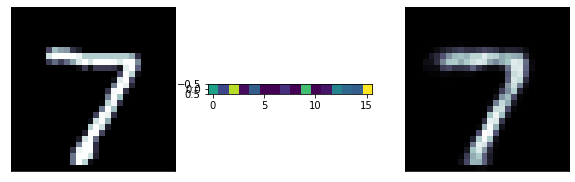

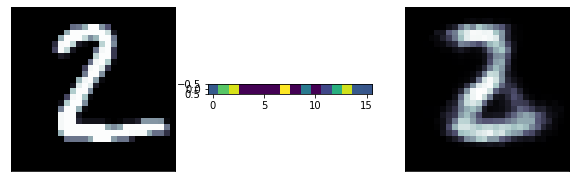

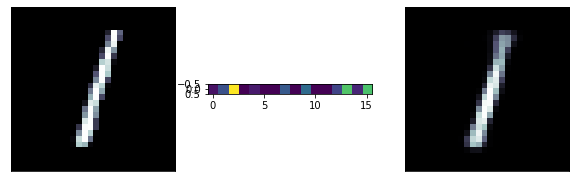

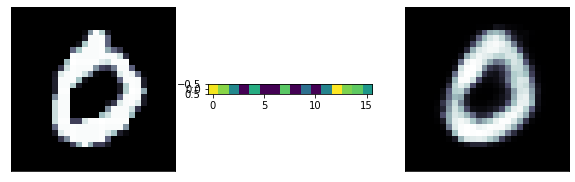

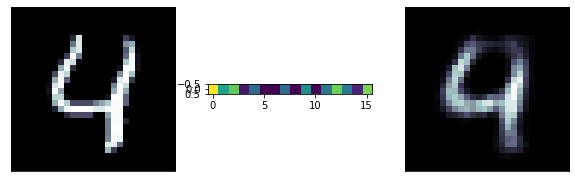

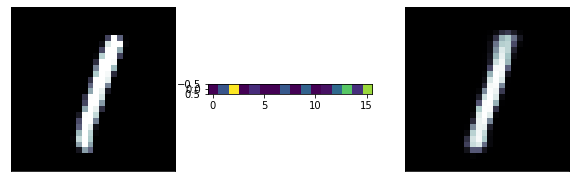

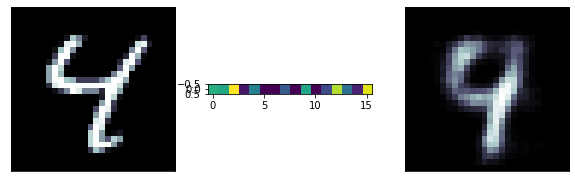

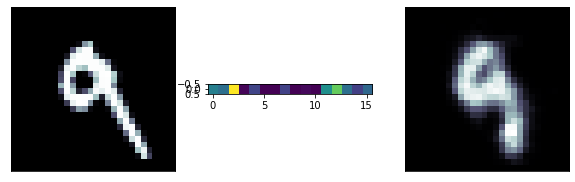

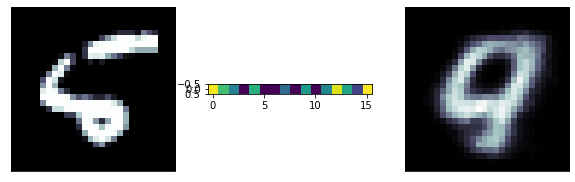

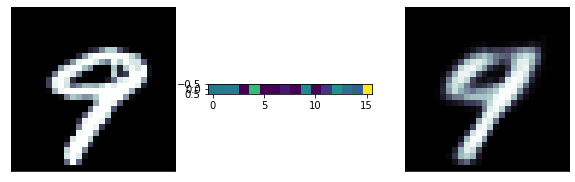

In [50]:
for i in range(10):
  compareinout_encoded(i, output_image, x_test)

# Self Pic analysis

In [105]:
nflist = glob.glob("HW9/*jpeg")
NN = len(nflist)
NN

1

In [150]:
shape(nimgs[0])

(100, 100, 1)

In [151]:
imgs

(1440, 35, 35, 1)

In [0]:
#if you want to do the super resolution case (predict image at higher resolution than input) pass the high resolution images as imgs_orig
#if you just want to predict at the same resolution pass 
#X_tr,  X_te, y_tr, y_te = train_test_split(imgs, imgs, test_size = .25, random_state=1)

In [0]:
from sklearn.model_selection import train_test_split
#split training and test set: 
nx_train,  nx_test, ny_train, ny_test = train_test_split(imgs, imgs, test_size = .25, random_state=1)

In [165]:
shape(nx_train[0])

(35, 35, 1)

(1080, 35, 35, 1)

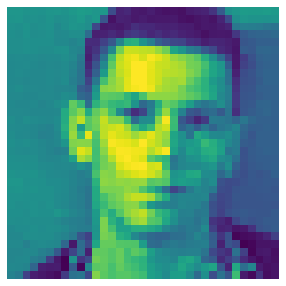

In [167]:
nimg_rows, nimg_cols = 35, 35
pl.imshow(nx_train[0,:,:,0])
pl.axis('off')
intialshape = nx_train[0].shape
ndim = np.prod(nx_train[0].shape)
nx_train.shape

In [178]:
nx_train = (nx_train.astype(float) / 255).reshape(len(nx_train), ndim)
nx_test = (nx_test.astype(float) / 255).reshape(len(nx_test), ndim)
nx_train.shape, nx_test.shape

((1080, 1225), (360, 1225))

In [0]:
model_self = Sequential()
## encoder
# input layer and the output size
model_self.add(Dense(128, activation='relu', input_dim=ndim))
#compression layer
model_self.add(Dense(64, activation='relu'))
model_self.add(Dense(32, activation='relu'))
## deencoder
model_self.add(Dense(64, activation='relu'))
#decompression layer, same size as in the encoder
model_self.add(Dense(128, activation='relu'))
#output layer, same size as input
model_self.add(Dense(ndim, activation='linear'))

In [174]:
35**2

1225

In [0]:
# choose the optimizer and loss appropriately!
model_self.compile(optimizer="adadelta", loss="mean_squared_error")

In [170]:
print(model_self.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 128)               156928    
_________________________________________________________________
dense_44 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_45 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_46 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_47 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_48 (Dense)             (None, 1225)              158025    
Total params: 335,721
Trainable params: 335,721
Non-trainable params: 0
________________________________________________

In [201]:
shape(x_train), shape(nx_train)

((60000, 784), (1080, 1225))

In [200]:
%%time
history_self = model_self.fit(nx_train, nx_train, 
                               validation_data=(nx_test, nx_test),
                               epochs=50000, batch_size=16, verbose=1)

Streaming output truncated to the last 5000 lines.
Epoch 7648/50000
1080/1080 [==============================] - 0s 245us/step - loss: 4.9717e-07 - val_loss: 4.7883e-07
Epoch 7649/50000
1080/1080 [==============================] - 0s 237us/step - loss: 4.9717e-07 - val_loss: 4.7883e-07
Epoch 7650/50000
1080/1080 [==============================] - 0s 234us/step - loss: 4.9717e-07 - val_loss: 4.7883e-07
Epoch 7651/50000
1080/1080 [==============================] - 0s 248us/step - loss: 4.9717e-07 - val_loss: 4.7883e-07
Epoch 7652/50000
1080/1080 [==============================] - 0s 227us/step - loss: 4.9717e-07 - val_loss: 4.7883e-07
Epoch 7653/50000
1080/1080 [==============================] - 0s 232us/step - loss: 4.9718e-07 - val_loss: 4.7884e-07
Epoch 7654/50000
1080/1080 [==============================] - 0s 240us/step - loss: 4.9718e-07 - val_loss: 4.7884e-07
Epoch 7655/50000
1080/1080 [==============================] - 0s 251us/step - loss: 4.9718e-07 - val_loss: 4.7885e-07
Epoch

KeyboardInterrupt: ignored

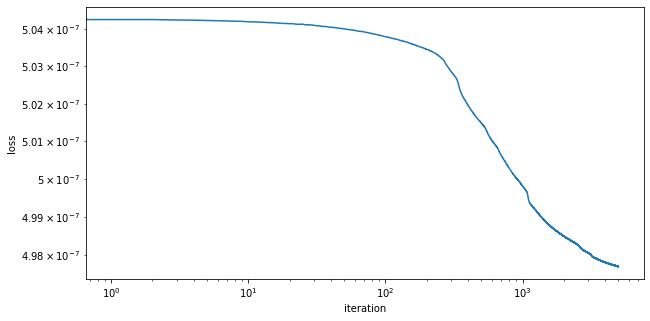

In [202]:
pl.plot(np.array(history_self.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration')
pl.yscale('log')
pl.xscale('log')

In [0]:
output_image_self = model_self.predict(nx_test)

In [0]:
def compareinout(i, outim, testimg, initialshape=(35,35)):
  fig = pl.figure(figsize(10,5))
  ax = fig.add_subplot(121) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(122) 
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


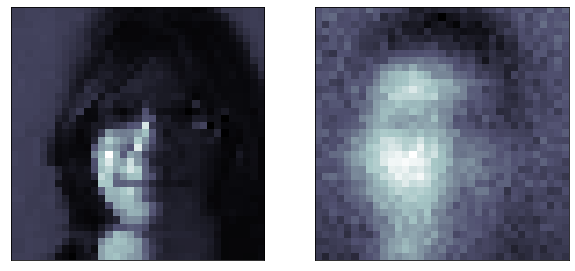

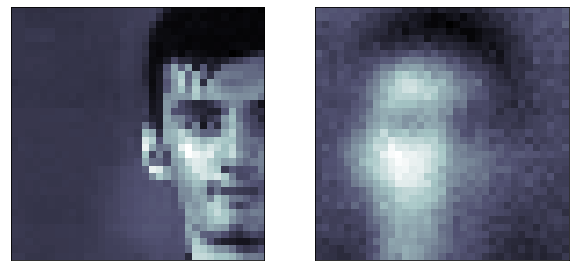

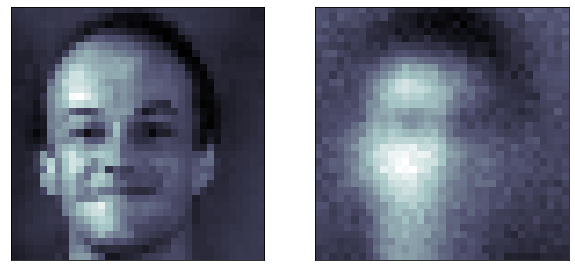

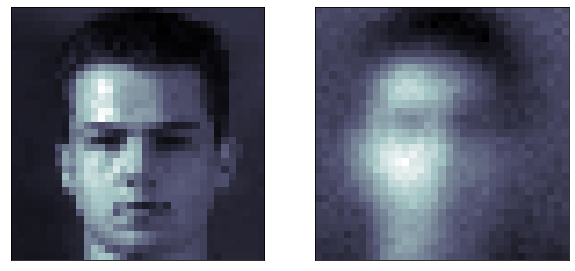

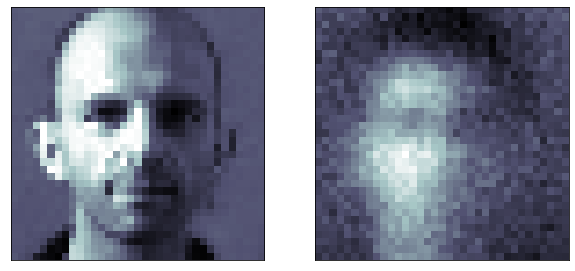

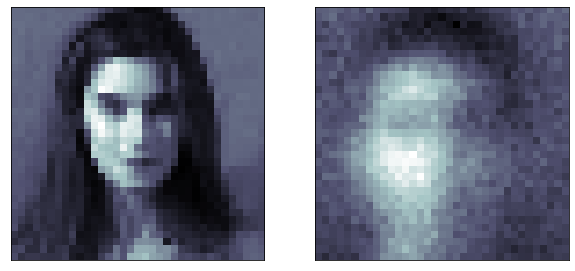

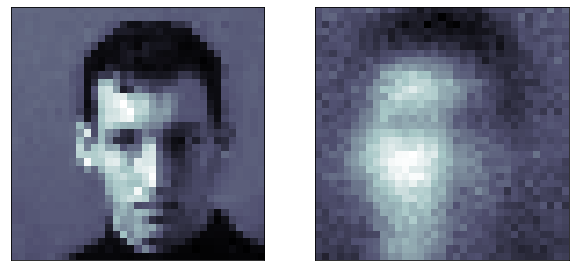

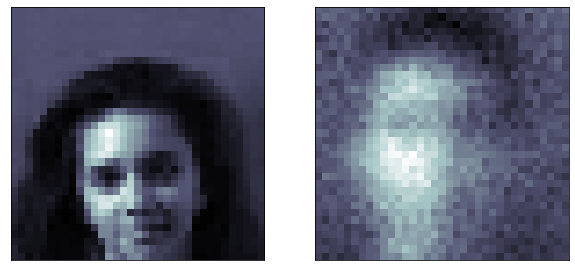

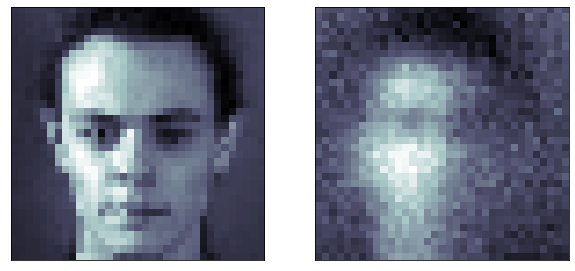

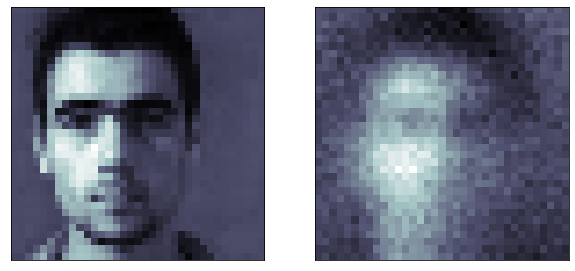

In [199]:
for i in range(10):
  compareinout(i, output_image_self, nx_test)

# Reproduction of image

0


(100, 100, 1)

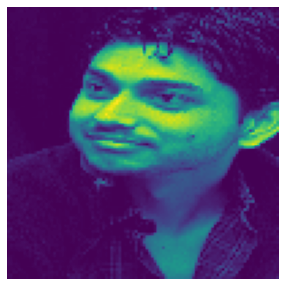

In [119]:
nimgs = np.zeros((NN, 100,100, 1))
for i,f in enumerate(nflist):
  if not i%50: print(i)
  nim = Image.open(nflist[i])
  nnp_im = numpy.array(nim)[:,:,:3].astype(float) / 255 
  nimgs[i] = numpy.array(nim)[100:700:6,100:500:4,:1].astype(float) / 255

nx_train, nx_test = nimgs[0,:,:], nimgs[0,:,:,0]

nimg_rows, nimg_cols = 100, 100
pl.imshow(nx_train[:,:,0])
pl.axis('off')
intialshape = nx_train[:,:,0].shape
ndim = np.prod(nx_train[:,:,0].shape)
nx_train.shape

In [0]:
'''
nimgs = np.zeros((NN, 100,100, 1))
for i,f in enumerate(nflist):
    if not i%50: print(i)
    nim = Image.open(nflist[i])
    nnp_im = numpy.array(nim)[:,:,:3].astype(float) / 255 
    nimgs[i] = numpy.array(nim)[100:700:6,100:500:4,1:2].astype(float) / 255

nx_train, nx_test = nimgs[0,:,:], nimgs[0,:,:,0]

nimg_rows, nimg_cols = 100, 100
pl.imshow(nx_train[:,:,0])
pl.axis('off')
intialshape = nx_train[:,:,0].shape
ndim = np.prod(nx_train[:,:,0].shape)
nx_train.shape
'''

In [0]:
'''
nimgs = np.zeros((NN, 100,100, 1))
for i,f in enumerate(nflist):
    if not i%50: print(i)
    nim = Image.open(nflist[i])
    nnp_im = numpy.array(nim)[:,:,:3].astype(float) / 255 
    nimgs[i] = numpy.array(nim)[100:700:6,100:500:4,2:3].astype(float) / 255

nx_train, nx_test = nimgs[0,:,:], nimgs[0,:,:,0]

nimg_rows, nimg_cols = 100, 100
pl.imshow(nx_train[:,:,0])
pl.axis('off')
intialshape = nx_train[:,:,0].shape
ndim = np.prod(nx_train[:,:,0].shape)
nx_train.shape
'''

In [124]:
nx_train = (nx_train.astype(float) / 255).reshape(ndim)
nx_test = (nx_test.astype(float) / 255).reshape(ndim)
nx_train.shape, nx_test.shape

((10000,), (10000,))

In [0]:
model_self = Sequential()
## encoder
# input layer and the output size
model_self.add(Dense(128, activation='relu', input_dim=ndim))
#compression layer
model_self.add(Dense(64, activation='relu'))
model_self.add(Dense(32, activation='relu'))
## deencoder
model_self.add(Dense(64, activation='relu'))
#decompression layer, same size as in the encoder
model_self.add(Dense(128, activation='relu'))
#output layer, same size as input
model_self.add(Dense(ndim, activation='linear'))

In [0]:
# choose the optimizer and loss appropriately!
model_self.compile(optimizer="adadelta", loss="mean_squared_error")

In [146]:
print(model_self.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 128)               1280128   
_________________________________________________________________
dense_38 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_39 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_40 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_41 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_42 (Dense)             (None, 10000)             1290000   
Total params: 2,590,896
Trainable params: 2,590,896
Non-trainable params: 0
____________________________________________

In [133]:
ndim

10000

In [147]:
history_self = model_self.fit(nx_train, nx_train, 
                               validation_data=(nx_test, nx_test),
                               epochs=20, batch_size=100, verbose=1)

ValueError: ignored